In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gene-expression-omnibus-geo-dataset-gse68086/GSE68086_TEP_data_matrix.csv
/kaggle/input/gene-expression-omnibus-geo-dataset-gse68086/GSE68086_series_matrix.txt
/kaggle/input/gene-expression-omnibus-geo-dataset-gse68086/GSE68086_series_matrix.csv
/kaggle/input/gene-expression-omnibus-geo-dataset-gse68086/GSE68086_TEP_data_matrix.txt/GSE68086_TEP_data_matrix.txt


In [2]:
expr = pd.read_csv('/kaggle/input/gene-expression-omnibus-geo-dataset-gse68086/GSE68086_TEP_data_matrix.csv')
meta = pd.read_csv('/kaggle/input/gene-expression-omnibus-geo-dataset-gse68086/GSE68086_series_matrix.csv')

In [3]:
print(expr.shape)
print(meta.shape)
print(expr.head())
print(meta.head())

(57736, 286)
(285, 46)
        Unnamed: 0  3-Breast-Her2-ampl  8-Breast-WT  10-Breast-Her2-ampl  \
0  ENSG00000000003                   0            0                    0   
1  ENSG00000000005                   0            0                    0   
2  ENSG00000000419                  44           14                   16   
3  ENSG00000000457                  26            1                   14   
4  ENSG00000000460                  81           98                   18   

   Breast-100  15-Breast-Her2-ampl  16-Breast-WT  21-Breast-WT  \
0           0                   17             0             0   
1           0                    0             0             0   
2           8                    9             0           139   
3           0                    4            20             1   
4          17                    0            20           144   

   33-Breast-Her2-ampl  42-Breast-Her2-ampl  ...  MGH-NSCLC-L20-TR500  \
0                    0                    0  ...  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:
expr.columns[1:6]

Index(['3-Breast-Her2-ampl', '8-Breast-WT', '10-Breast-Her2-ampl',
       'Breast-100', '15-Breast-Her2-ampl'],
      dtype='object')

In [5]:
meta['!Sample_source_name_ch1'].head()

0     "3-Breast-Her2-ampl"
1            "8-Breast-WT"
2    "10-Breast-Her2-ampl"
3             "Breast-100"
4    "15-Breast-Her2-ampl"
Name: !Sample_source_name_ch1, dtype: object

In [6]:
#错误尝试
#sample_names = meta['!Sample_source_name_ch1']
#meta['label_cancer'] = sample_names.apply(
    #lambda x: 0 if "Healthy" in x else 1
#)
#meta[['!Sample_source_name_ch1', 'label_cancer']].head()
#meta['label_cancer'].value_counts()

In [7]:
meta['!Sample_source_name_ch1'].unique()

array(['"3-Breast-Her2-ampl"', '"8-Breast-WT"', '"10-Breast-Her2-ampl"',
       '"Breast-100"', '"15-Breast-Her2-ampl"', '"16-Breast-WT"',
       '"21-Breast-WT"', '"33-Breast-Her2-ampl"', '"42-Breast-Her2-ampl"',
       '"Breast-454"', '"48-Breast-WT"', '"50-Breast-WT"',
       '"55-Breast-WT"', '"Type-Unknown-6"', '"Breast-564"',
       '"59-Breast-WT"', '"Breast-590"', '"Breast-60"', '"Breast-603"',
       '"ALK61-Breast-Her2-unknown"', '"Breast-85"', '"Breast-86"',
       '"97-Breast-Her2-ampl"', '"Breast-ALK-82"', '"292-Liver-KRAS"',
       '"316-Liver-KRAS"', '"341-Liver-WT"', '"376-Liver-WT"',
       '"379-Liver-WT"', '"Chol-410"', '"Chol-442"', '"Chol-460"',
       '"Chol-611"', '"Chol-ALK-28"', '"VU256-CRC"', '"VU258-CRC"',
       '"VU272-CRC"', '"VU276-CRC"', '"Type-Unknown-1"', '"329-CRC-KRAS"',
       '"342-CRC-KRAS"', '"Type-Unknown-5"', '"354-CRC-WT"',
       '"356-CRC-WT"', '"CRC-357"', '"374-CRC-WT"', '"378-CRC-WT"',
       '"420-CRC-WT"', '"429-CRC-WT"', '"CRC-450"', '

In [8]:
meta['!Sample_characteristics_ch1.1'].unique()

array(['"cell type: Thrombocytes"', '"cancer type: Breast"',
       '"cancer type: Hepatobiliary"', '"cancer type: CRC"',
       '"cancer type: Lung"'], dtype=object)

In [9]:
meta['!Sample_characteristics_ch1.1'].value_counts()

!Sample_characteristics_ch1.1
"cell type: Thrombocytes"       245
"cancer type: Lung"              20
"cancer type: Breast"            15
"cancer type: CRC"                4
"cancer type: Hepatobiliary"      1
Name: count, dtype: int64

In [10]:
meta['sample_name'] = meta['!Sample_source_name_ch1'].str.strip('"')
#meta['label_cancer'] = -meta['sample_name'].str.startswith(('HD-', 'Control-'))
#meta['label_cancer'].value_counts()

In [11]:
def classify_sample(name):
    if name.startswith('HD-') or name.startswith('Control-'):
        return 'Healthy'
    elif name.startswith('Type-Unknown-'):
        return 'Type-Unknown'
    else:
        return 'Cancer'

meta['disease_status'] = meta['sample_name'].apply(classify_sample)
meta['disease_status'].value_counts()

disease_status
Cancer          226
Healthy          54
Type-Unknown      5
Name: count, dtype: int64

In [12]:
meta_clean = meta[meta['disease_status'] != 'Type-Unknown']
meta_clean['disease_status'].value_counts()

disease_status
Cancer     226
Healthy     54
Name: count, dtype: int64

In [13]:
expr_samples = set(expr.columns[1:])
meta_samples = set(meta_clean['sample_name'])

common_samples = expr_samples & meta_samples
len(common_samples)

280

In [14]:
expr_clean = expr[['Unnamed: 0'] + list(common_samples)]
meta_clean = meta_clean[meta_clean['sample_name'].isin(common_samples)]
print(expr_clean.shape)
print(meta_clean.shape)

(57736, 281)
(280, 48)


In [15]:
meta_clean.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1.1,...,!Sample_library_source,!Sample_library_strategy,!Sample_relation,!Sample_relation.1,!Sample_supplementary_file_1,!series_matrix_table_begin,"""ID_REF""",!series_matrix_table_end,sample_name,disease_status
0,"""GSM1662534""","""Public on Oct 30 2015""","""Apr 21 2015""","""May 15 2019""","""SRA""","""1""","""3-Breast-Her2-ampl""","""Homo sapiens""","""tissue: blood""","""cell type: Thrombocytes""",...,"""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE""",NaN,"""GSM1662534""",NaN,3-Breast-Her2-ampl,Cancer
1,"""GSM1662535""","""Public on Oct 30 2015""","""Apr 21 2015""","""May 15 2019""","""SRA""","""1""","""8-Breast-WT""","""Homo sapiens""","""tissue: blood""","""cell type: Thrombocytes""",...,"""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE""",NaN,"""GSM1662535""",NaN,8-Breast-WT,Cancer
2,"""GSM1662536""","""Public on Oct 30 2015""","""Apr 21 2015""","""May 15 2019""","""SRA""","""1""","""10-Breast-Her2-ampl""","""Homo sapiens""","""tissue: blood""","""cell type: Thrombocytes""",...,"""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE""",NaN,"""GSM1662536""",NaN,10-Breast-Her2-ampl,Cancer
3,"""GSM1662537""","""Public on Oct 30 2015""","""Apr 21 2015""","""May 15 2019""","""SRA""","""1""","""Breast-100""","""Homo sapiens""","""tissue: blood""","""cell type: Thrombocytes""",...,"""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE""",NaN,"""GSM1662537""",NaN,Breast-100,Cancer
4,"""GSM1662538""","""Public on Oct 30 2015""","""Apr 21 2015""","""May 15 2019""","""SRA""","""1""","""15-Breast-Her2-ampl""","""Homo sapiens""","""tissue: blood""","""cell type: Thrombocytes""",...,"""transcriptomic""","""RNA-Seq""","""BioSample: https://www.ncbi.nlm.nih.gov/biosa...","""SRA: https://www.ncbi.nlm.nih.gov/sra?term=SR...","""NONE""",NaN,"""GSM1662538""",NaN,15-Breast-Her2-ampl,Cancer


In [16]:
meta_clean['disease_status'].value_counts()

disease_status
Cancer     226
Healthy     54
Name: count, dtype: int64

In [17]:
set(expr_clean.columns[1:]) == set(meta_clean['sample_name'])

True

In [18]:
#1 以表达矩阵的样本顺序为主，用meta进行索引对齐，确保XY一致
X = expr_clean.iloc[:, 1:].T
Y = meta_clean.set_index('sample_name').loc[X.index, 'disease_status']
print(X.shape)
print(Y.shape)
print(X.head())
print(Y.head())

(280, 57736)
(280,)
                     0      1      2      3      4      5      6      7      \
Lung-0025J               0      0     12      0      4     10      0     93   
Lung-0074-EGFR           0      0     86     90     50   1215      0     39   
316-Liver-KRAS           0      0     13      0     37     44      0     62   
420-CRC-WT               4      0     39     10     20     79      0     42   
MGH-NSCLC-L01-TR458      0      0      0     21     18      9      0     27   

                     8      9      ...  57726  57727  57728  57729  57730  \
Lung-0025J              23      0  ...      0      0      0      0      0   
Lung-0074-EGFR         120      0  ...      0      0      0      0      0   
316-Liver-KRAS           0      7  ...      0      0      0      0      1   
420-CRC-WT               0      4  ...      0      0      0      0      0   
MGH-NSCLC-L01-TR458      0      0  ...      0      0      0      0      0   

                     57731  57732  57733  

In [19]:
#2 快捷但风险高，假设所有meta里的sample都在expr里且顺序不会错
x = expr_clean[meta_clean['sample_name']]
y = meta_clean['disease_status']
print(x.shape)
print(y.shape)
print(x.head())
print(y.head())

(57736, 280)
(280,)
   3-Breast-Her2-ampl  8-Breast-WT  10-Breast-Her2-ampl  Breast-100  \
0                   0            0                    0           0   
1                   0            0                    0           0   
2                  44           14                   16           8   
3                  26            1                   14           0   
4                  81           98                   18          17   

   15-Breast-Her2-ampl  16-Breast-WT  21-Breast-WT  33-Breast-Her2-ampl  \
0                   17             0             0                    0   
1                    0             0             0                    0   
2                    9             0           139                  108   
3                    4            20             1                   26   
4                    0            20           144                   26   

   42-Breast-Her2-ampl  Breast-454  ...  MGH-NSCLC-L20-TR500  \
0                    0           0  ..

In [20]:
#筛选基因，避免直接标准化计算量过大系统卡死
gene_var = X.var(axis=0)  #或者gene_var = x.var(axis=1)，axis指向sample维度，这段后续都是x
top_genes = gene_var.sort_values(ascending=False).head(1000).index #这里选1000是因为经验上说n_features ≤ 3–5 × n_samples，过大容易过拟合
X_top = X[top_genes]
print(X_top.shape)

(280, 1000)


In [21]:
#标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

In [22]:
#做PCA（只取前两个主成分）
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(X_pca.shape)

(280, 2)


In [23]:
pca_df = pd.DataFrame(
    X_pca,
    columns=['pc1', 'pc2'],
    index=X.index
)
pca_df['disease_status'] = Y.values

print(pca_df.head())

                           pc1        pc2 disease_status
Lung-0025J           16.576312 -12.296422         Cancer
Lung-0074-EGFR       26.338058  42.780363         Cancer
316-Liver-KRAS        7.129581  -4.740701         Cancer
420-CRC-WT           16.657955  -1.417611         Cancer
MGH-NSCLC-L01-TR458  -3.371713 -11.758281         Cancer


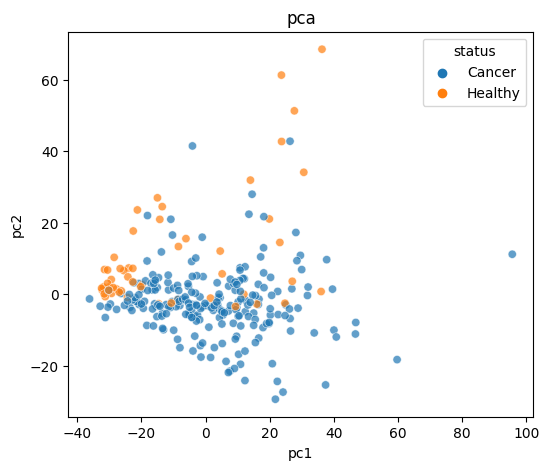

In [24]:
#draw
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pca_df, 
    x='pc1', 
    y='pc2', 
    hue='disease_status',
    alpha=0.7
)
plt.title('pca')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(title='status')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42,
    stratify=Y  #分数据的时候，按照 y 的类别比例来分，保证训练集和测试集里的cancer/healthy比例一致
)

scaler.fit(X_train) #只在训练集学规则，训练集决定世界观，transform是用学好的规则去变换数据
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
logistic_reg = LogisticRegression(
    penalty='l2', #防止模型乱拟合
    C=1.0,   #正则化强度，先用默认
    solver='liblinear',
    max_iter=1000,  #防止不收敛
    random_state=42
)

logistic_reg.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [27]:
Y_predict = logistic_reg.predict(X_test_scaled)
Y_prob = logistic_reg.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(Y_test, Y_predict)
auc = roc_auc_score(Y_test, Y_prob)

print("accuracy:", acc)
print("roc_auc:", auc)
print(classification_report(Y_test, Y_predict))

accuracy: 0.8571428571428571
roc_auc: 0.9515151515151515
              precision    recall  f1-score   support

      Cancer       1.00      0.82      0.90        45
     Healthy       0.58      1.00      0.73        11

    accuracy                           0.86        56
   macro avg       0.79      0.91      0.82        56
weighted avg       0.92      0.86      0.87        56

